In [30]:
import pandas as pd 
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt 
pd.set_option('display.float_format', lambda x: '%0.4f' % x)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import warnings
warnings.filterwarnings("ignore")

In [2]:
data =pd.read_csv(r'Datasets\cleaned_dataset1_encoded.csv')
data.head()

,Unnamed: 0.1,Unnamed: 0,customerid,bank_name_clients,employment_status_clients,level_of_education_clients,No_of_prevloans,Total_amount_borrowed,Total_amount_due,Average_termdays,last_approveddate,last_creationdate,last_closeddate,last_firstduedate,last_firstrepaiddate,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,age,bank_account_type_Current,bank_account_type_Other,bank_account_type_Savings,loan_close_time,loan_approval_time,loan_firstPayment_time
0,0,0,8a858e135cb22031015cbafc76964ebd,GT Bank,6,4,1.0000,10000.0000,11500.0000,15.0000,2017-06-19 17:55:26,2017-06-19 16:54:19,2017-07-04 18:09:47,2017-07-05 00:00:00.000000,2017-07-04 17:59:36,301964962.0000,2.0000,2017-07-05 14:29:48.000000,2017-07-05 13:29:42.000000,10000.0000,13000.0000,30.0000,Good,50.0000,False,False,True,15.0000,1.0186,15.0000
1,1,1,8a858e275c7ea5ec015c82482d7c3996,Sterling Bank,1,4,1.0000,10000.0000,13000.0000,30.0000,2017-06-07 12:47:30,2017-06-07 11:46:22,2017-07-10 08:52:54,2017-07-07 00:00:00.000000,2017-07-10 08:42:44,301972172.0000,2.0000,2017-07-10 21:21:46.000000,2017-07-10 20:21:40.000000,10000.0000,13000.0000,30.0000,Bad,38.0000,False,False,True,32.0000,1.0189,32.0000
2,2,2,8a858e5b5bd99460015bdc95cd485634,Fidelity Bank,6,4,3.0000,30000.0000,36000.0000,20.0000,2017-06-08 11:49:34,2017-06-08 10:49:27,2017-07-11 10:12:20,2017-07-10 00:00:00.000000,2017-07-11 10:02:11,301976271.0000,4.0000,2017-07-13 15:40:27.000000,2017-07-13 14:40:19.000000,10000.0000,13000.0000,30.0000,Good,37.0000,False,False,True,32.0000,1.0019,32.0000
3,3,3,8a858efd5ca70688015cabd1f1e94b55,GT Bank,1,4,1.0000,10000.0000,11500.0000,15.0000,2017-06-15 14:05:26,2017-06-15 13:04:18,2017-07-18 19:24:13,2017-06-30 00:00:00.000000,2017-07-18 19:14:05,301997763.0000,2.0000,2017-07-26 21:03:17.000000,2017-07-26 20:03:09.000000,10000.0000,11500.0000,15.0000,Good,32.0000,False,False,True,33.0000,1.0189,33.0000
4,4,4,8a858e785acd3412015acd48f4920d04,GT Bank,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.0000,False,False,True,NaN,NaN,NaN


In [3]:
len(data)

4334

## Qn what are the different attributes?

In [12]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'customerid', 'bank_name_clients',
       'employment_status_clients', 'level_of_education_clients',
       'No_of_prevloans', 'Total_amount_borrowed', 'Total_amount_due',
       'Average_termdays', 'last_approveddate', 'last_creationdate',
       'last_closeddate', 'last_firstduedate', 'last_firstrepaiddate',
       'systemloanid', 'loannumber', 'approveddate', 'creationdate',
       'loanamount', 'totaldue', 'termdays', 'good_bad_flag', 'age',
       'bank_account_type_Current', 'bank_account_type_Other',
       'bank_account_type_Savings', 'loan_close_time', 'loan_approval_time',
       'loan_firstPayment_time'],
      dtype='object')

## QN What is the count of null values per attribute?

In [4]:
data.isnull().sum(axis = 0)

Unnamed: 0.1                     0
Unnamed: 0                       0
customerid                       0
bank_name_clients                0
employment_status_clients        0
level_of_education_clients       0
No_of_prevloans               1070
Total_amount_borrowed         1070
Total_amount_due              1070
Average_termdays              1070
last_approveddate             1070
last_creationdate             1070
last_closeddate               1070
last_firstduedate             1070
last_firstrepaiddate          1070
systemloanid                  1065
loannumber                    1065
approveddate                  1065
creationdate                  1065
loanamount                    1065
totaldue                      1065
termdays                      1065
good_bad_flag                 1065
age                              0
bank_account_type_Current        0
bank_account_type_Other          0
bank_account_type_Savings        0
loan_close_time               1070
loan_approval_time  

### from the above, nulls are caused by customers who have not taken laons 

In [5]:
# dropping unnamed columns
data=data.drop(['Unnamed: 0.1','Unnamed: 0'],axis=1)
data.columns

Index(['customerid', 'bank_name_clients', 'employment_status_clients', 'level_of_education_clients', 'No_of_prevloans', 'Total_amount_borrowed', 'Total_amount_due', 'Average_termdays', 'last_approveddate', 'last_creationdate', 'last_closeddate', 'last_firstduedate', 'last_firstrepaiddate', 'systemloanid', 'loannumber', 'approveddate', 'creationdate', 'loanamount', 'totaldue', 'termdays', 'good_bad_flag', 'age', 'bank_account_type_Current', 'bank_account_type_Other', 'bank_account_type_Savings', 'loan_close_time', 'loan_approval_time', 'loan_firstPayment_time'], dtype='object')

In [6]:
# Removing Customers who have not taken loans 
bool_series = pd.notnull(data["No_of_prevloans"])
filtered_data = data[bool_series]
filtered_data.head()

,customerid,bank_name_clients,employment_status_clients,level_of_education_clients,No_of_prevloans,Total_amount_borrowed,Total_amount_due,Average_termdays,last_approveddate,last_creationdate,last_closeddate,last_firstduedate,last_firstrepaiddate,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,age,bank_account_type_Current,bank_account_type_Other,bank_account_type_Savings,loan_close_time,loan_approval_time,loan_firstPayment_time
0,8a858e135cb22031015cbafc76964ebd,GT Bank,6,4,1.0000,10000.0000,11500.0000,15.0000,2017-06-19 17:55:26,2017-06-19 16:54:19,2017-07-04 18:09:47,2017-07-05 00:00:00.000000,2017-07-04 17:59:36,301964962.0000,2.0000,2017-07-05 14:29:48.000000,2017-07-05 13:29:42.000000,10000.0000,13000.0000,30.0000,Good,50.0000,False,False,True,15.0000,1.0186,15.0000
1,8a858e275c7ea5ec015c82482d7c3996,Sterling Bank,1,4,1.0000,10000.0000,13000.0000,30.0000,2017-06-07 12:47:30,2017-06-07 11:46:22,2017-07-10 08:52:54,2017-07-07 00:00:00.000000,2017-07-10 08:42:44,301972172.0000,2.0000,2017-07-10 21:21:46.000000,2017-07-10 20:21:40.000000,10000.0000,13000.0000,30.0000,Bad,38.0000,False,False,True,32.0000,1.0189,32.0000
2,8a858e5b5bd99460015bdc95cd485634,Fidelity Bank,6,4,3.0000,30000.0000,36000.0000,20.0000,2017-06-08 11:49:34,2017-06-08 10:49:27,2017-07-11 10:12:20,2017-07-10 00:00:00.000000,2017-07-11 10:02:11,301976271.0000,4.0000,2017-07-13 15:40:27.000000,2017-07-13 14:40:19.000000,10000.0000,13000.0000,30.0000,Good,37.0000,False,False,True,32.0000,1.0019,32.0000
3,8a858efd5ca70688015cabd1f1e94b55,GT Bank,1,4,1.0000,10000.0000,11500.0000,15.0000,2017-06-15 14:05:26,2017-06-15 13:04:18,2017-07-18 19:24:13,2017-06-30 00:00:00.000000,2017-07-18 19:14:05,301997763.0000,2.0000,2017-07-26 21:03:17.000000,2017-07-26 20:03:09.000000,10000.0000,11500.0000,15.0000,Good,32.0000,False,False,True,33.0000,1.0189,33.0000
6,8a858ea05a859123015a8892914d15b7,Access Bank,1,4,5.0000,70000.0000,88000.0000,30.0000,2017-06-27 13:07:32,2017-06-27 12:06:24,2017-07-21 21:57:17,2017-07-27 00:00:00.000000,2017-07-21 21:47:08,301992494.0000,6.0000,2017-07-23 21:44:43.000000,2017-07-23 20:44:36.000000,20000.0000,24500.0000,30.0000,Good,33.0000,False,False,True,24.0000,1.0189,24.0000


In [7]:
len(filtered_data)

3264

### Do we still have nulls?

In [9]:
filtered_data.isnull().sum(axis = 0)

customerid                    0
bank_name_clients             0
employment_status_clients     0
level_of_education_clients    0
No_of_prevloans               0
Total_amount_borrowed         0
Total_amount_due              0
Average_termdays              0
last_approveddate             0
last_creationdate             0
last_closeddate               0
last_firstduedate             0
last_firstrepaiddate          0
systemloanid                  0
loannumber                    0
approveddate                  0
creationdate                  0
loanamount                    0
totaldue                      0
termdays                      0
good_bad_flag                 0
age                           0
bank_account_type_Current     0
bank_account_type_Other       0
bank_account_type_Savings     0
loan_close_time               0
loan_approval_time            0
loan_firstPayment_time        0
dtype: int64

## Qn How are customers distributed on the good_bad_flag?

<Axes: xlabel='good_bad_flag', ylabel='count'>

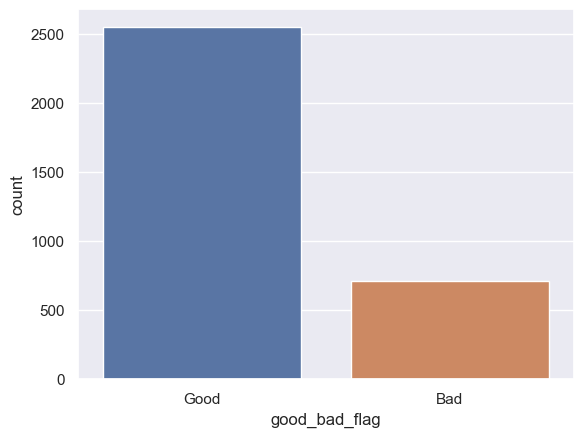

In [10]:
sns.countplot(x='good_bad_flag',data=filtered_data)

In [11]:
filtered_data.groupby('good_bad_flag').agg({'customerid':'nunique'})

,customerid
good_bad_flag,
Bad,711
Good,2553


### From the above data we have an imbalanced dataset.

# Qn How is age distributed?

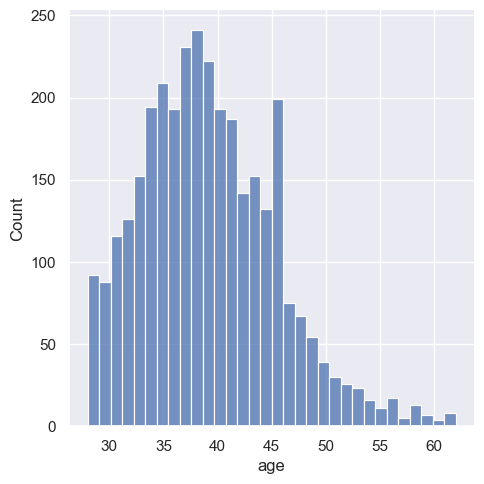

In [12]:
sns.displot(filtered_data['age'])

## How are customers distributed into different banks?

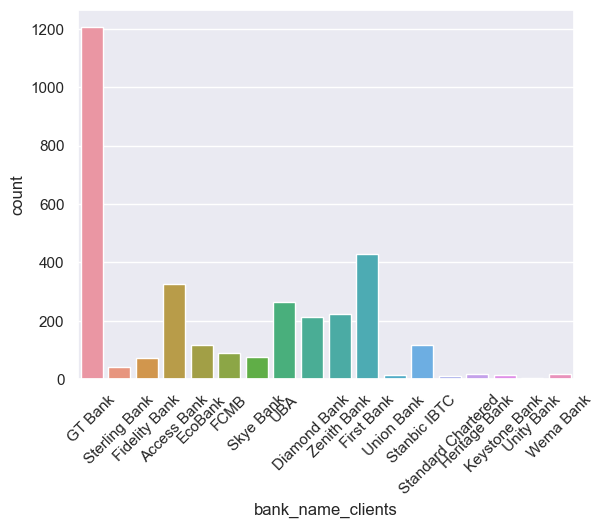

In [24]:
sns.countplot(x='bank_name_clients',data=filtered_data)
plt.xticks(rotation=45)
plt.show()

## How are they distributed in terms of employment?

<Axes: xlabel='employment_status_clients', ylabel='count'>

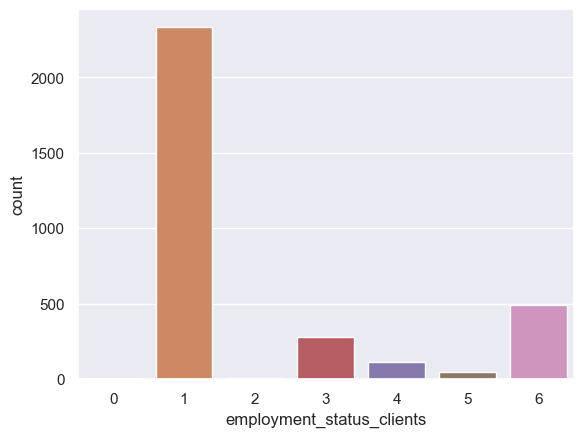

In [25]:
sns.countplot(x='employment_status_clients',data=filtered_data)

## QN How are they distributed in education ?

<Axes: xlabel='level_of_education_clients', ylabel='count'>

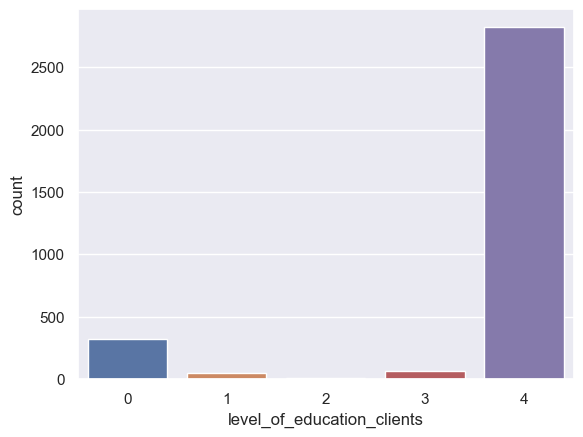

In [26]:
sns.countplot(x='level_of_education_clients',data=filtered_data)

# Qn How are the numerical columns distributed?

In [13]:
filtered_data.describe().T

,count,mean,std,min,25%,50%,75%,max
employment_status_clients,3264.0000,2.0806,1.8621,0.0000,1.0000,1.0000,3.0000,6.0000
level_of_education_clients,3264.0000,3.5392,1.2320,0.0000,4.0000,4.0000,4.0000,4.0000
No_of_prevloans,3264.0000,4.1890,3.6680,1.0000,1.0000,3.0000,6.0000,26.0000
Total_amount_borrowed,3264.0000,69412.6838,89963.6953,5000.0000,10000.0000,30000.0000,90000.0000,770000.0000
Total_amount_due,3264.0000,82316.9690,103488.7011,5750.0000,13000.0000,36000.0000,109600.0000,866300.0000
Average_termdays,3264.0000,25.3619,6.8688,15.0000,20.0000,27.8571,30.0000,60.0000
systemloanid,3264.0000,301980714.4400,13442.9857,301958485.0000,301968846.7500,301979414.0000,301993360.2500,302004050.0000
loannumber,3264.0000,5.1939,3.6682,2.0000,2.0000,4.0000,7.0000,27.0000
loanamount,3264.0000,17841.6054,10746.2743,10000.0000,10000.0000,10000.0000,20000.0000,60000.0000
totaldue,3264.0000,21290.9545,11930.9072,10000.0000,13000.0000,13000.0000,24500.0000,68100.0000


## How is data distributed among the differnt colums?

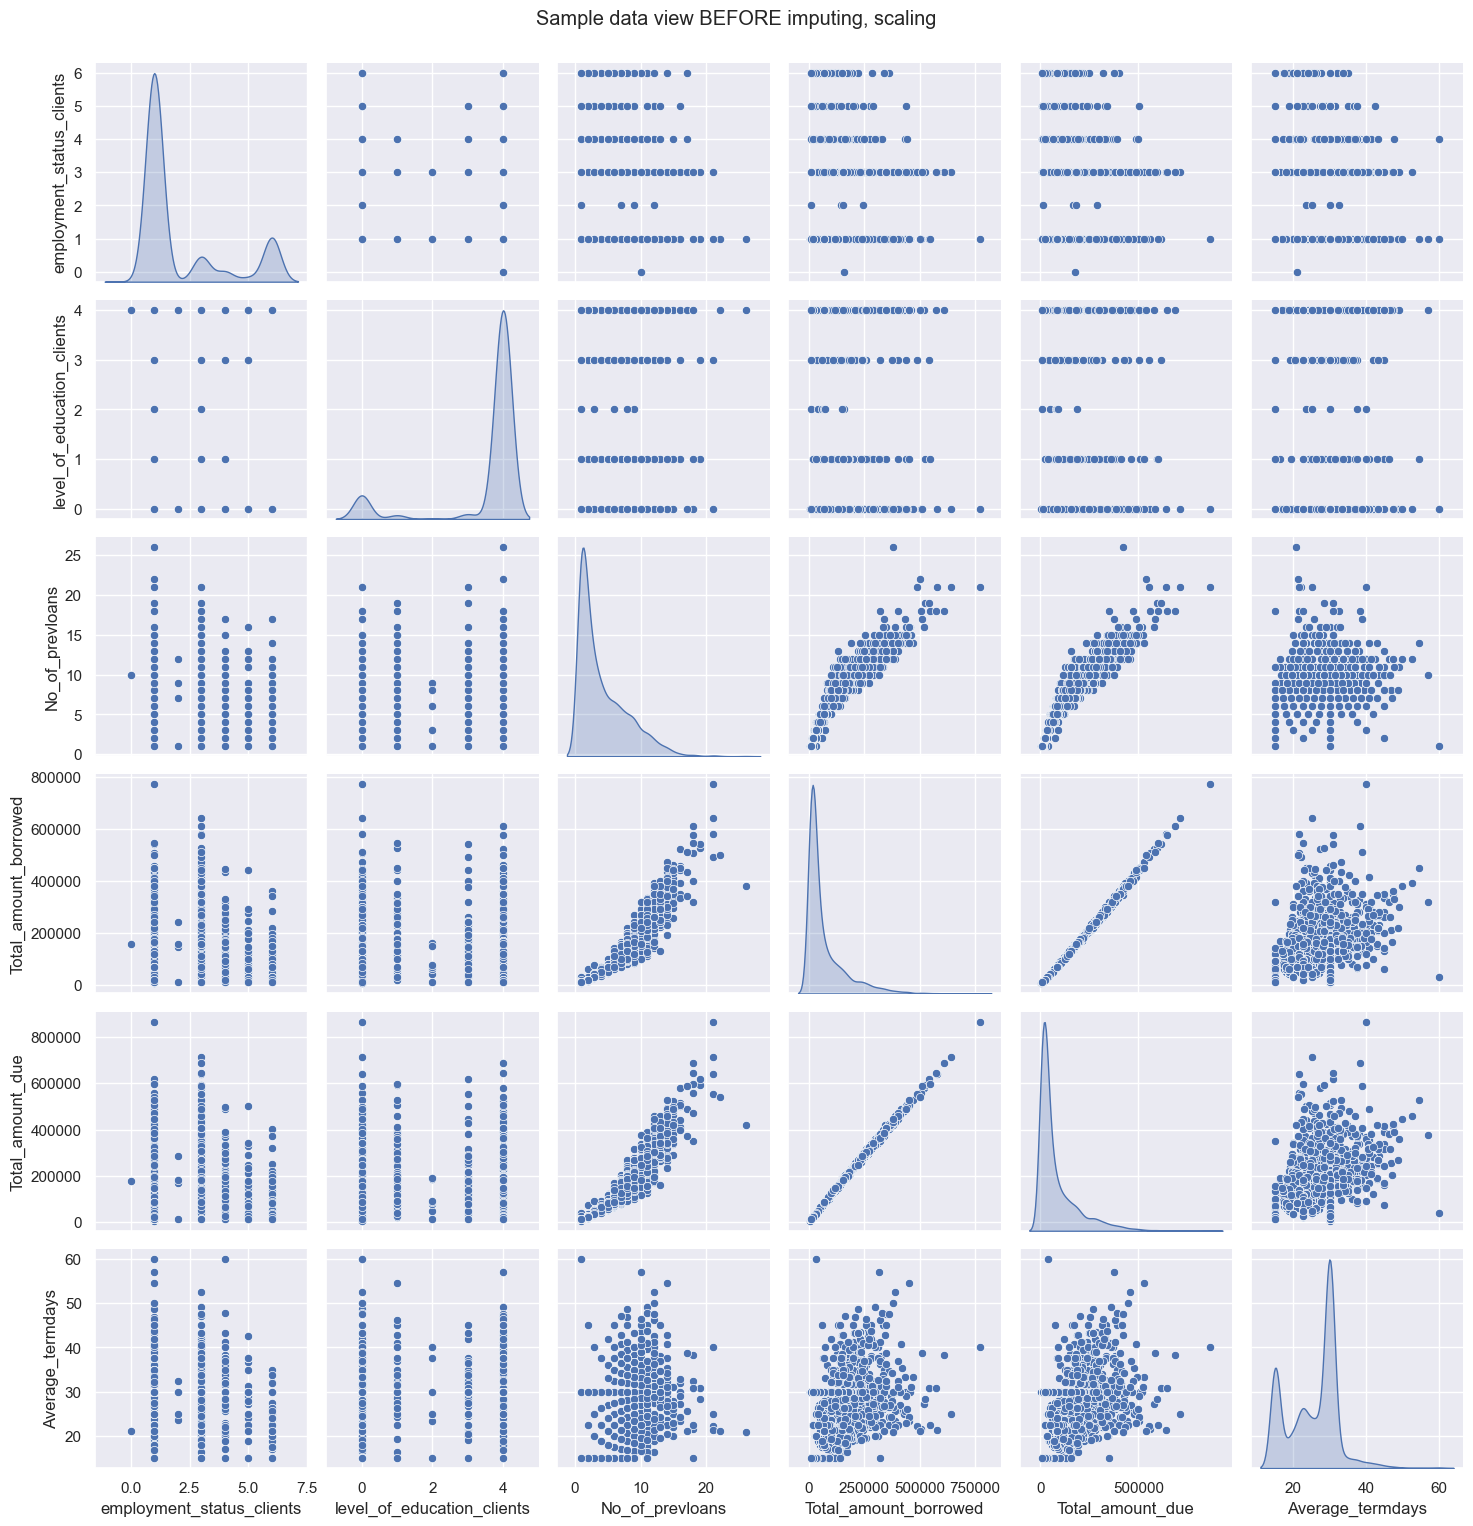

In [15]:
pr1plt = sns.pairplot(filtered_data.iloc[:, :10], diag_kind='kde')
pr1plt.fig.suptitle("Sample data view BEFORE imputing, scaling", y=1.02)
plt.show()
plt.close()

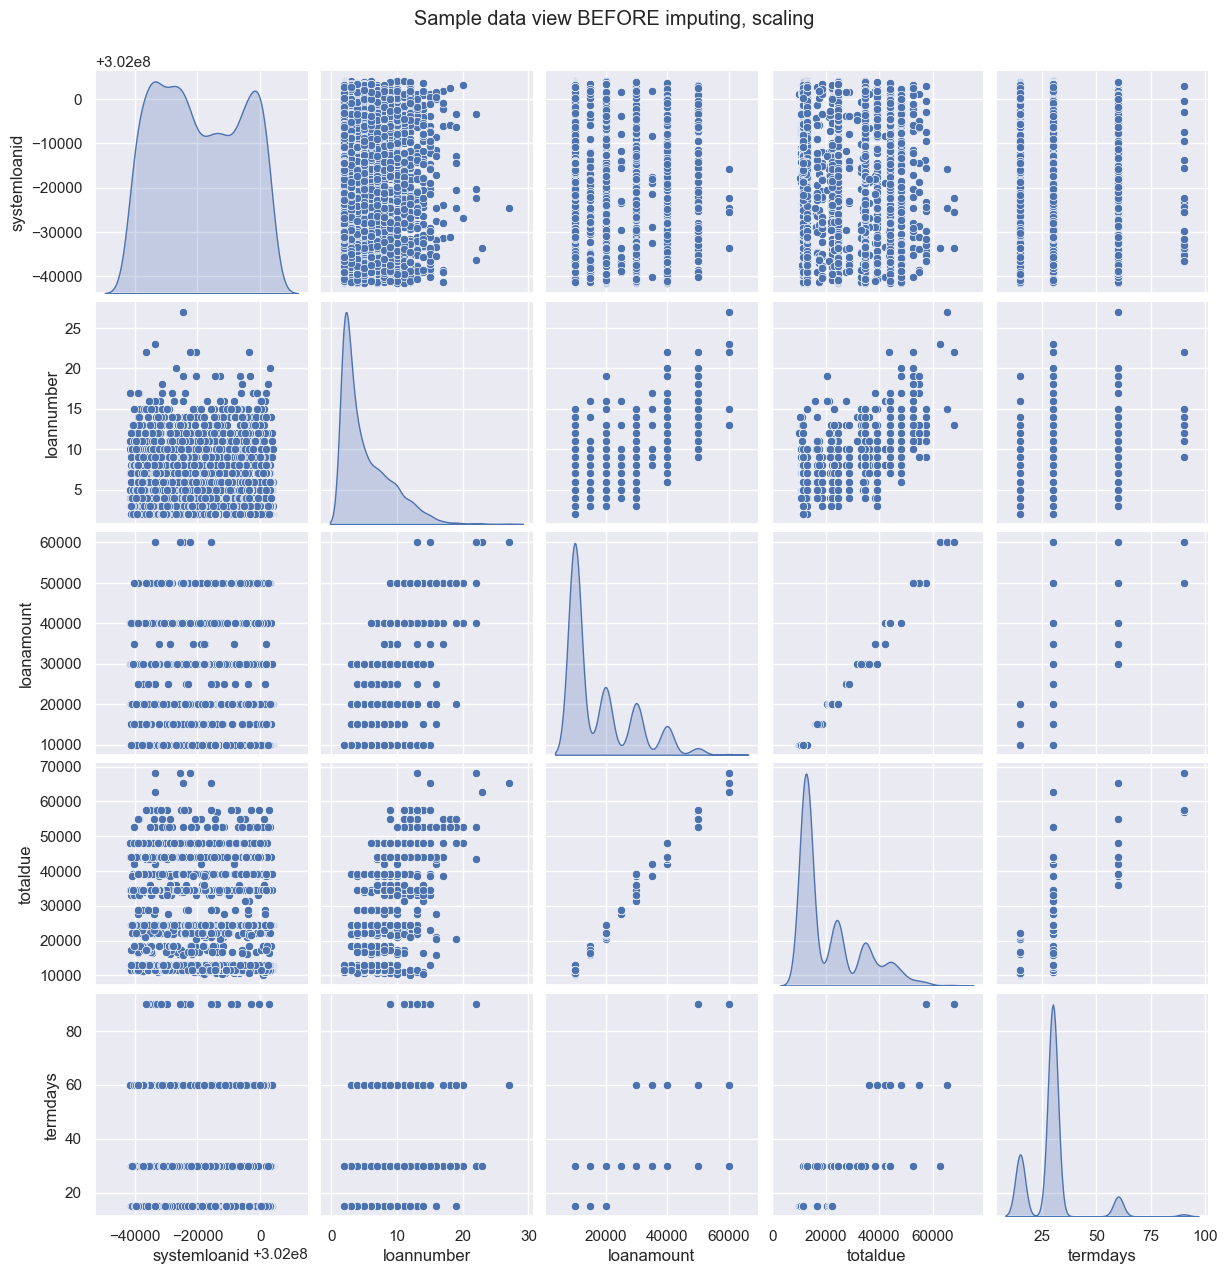

In [20]:
pr1plt = sns.pairplot(filtered_data.iloc[:, 10:20], diag_kind='kde')
pr1plt.fig.suptitle("Sample data view BEFORE imputing, scaling", y=1.02)
plt.show()
plt.close()

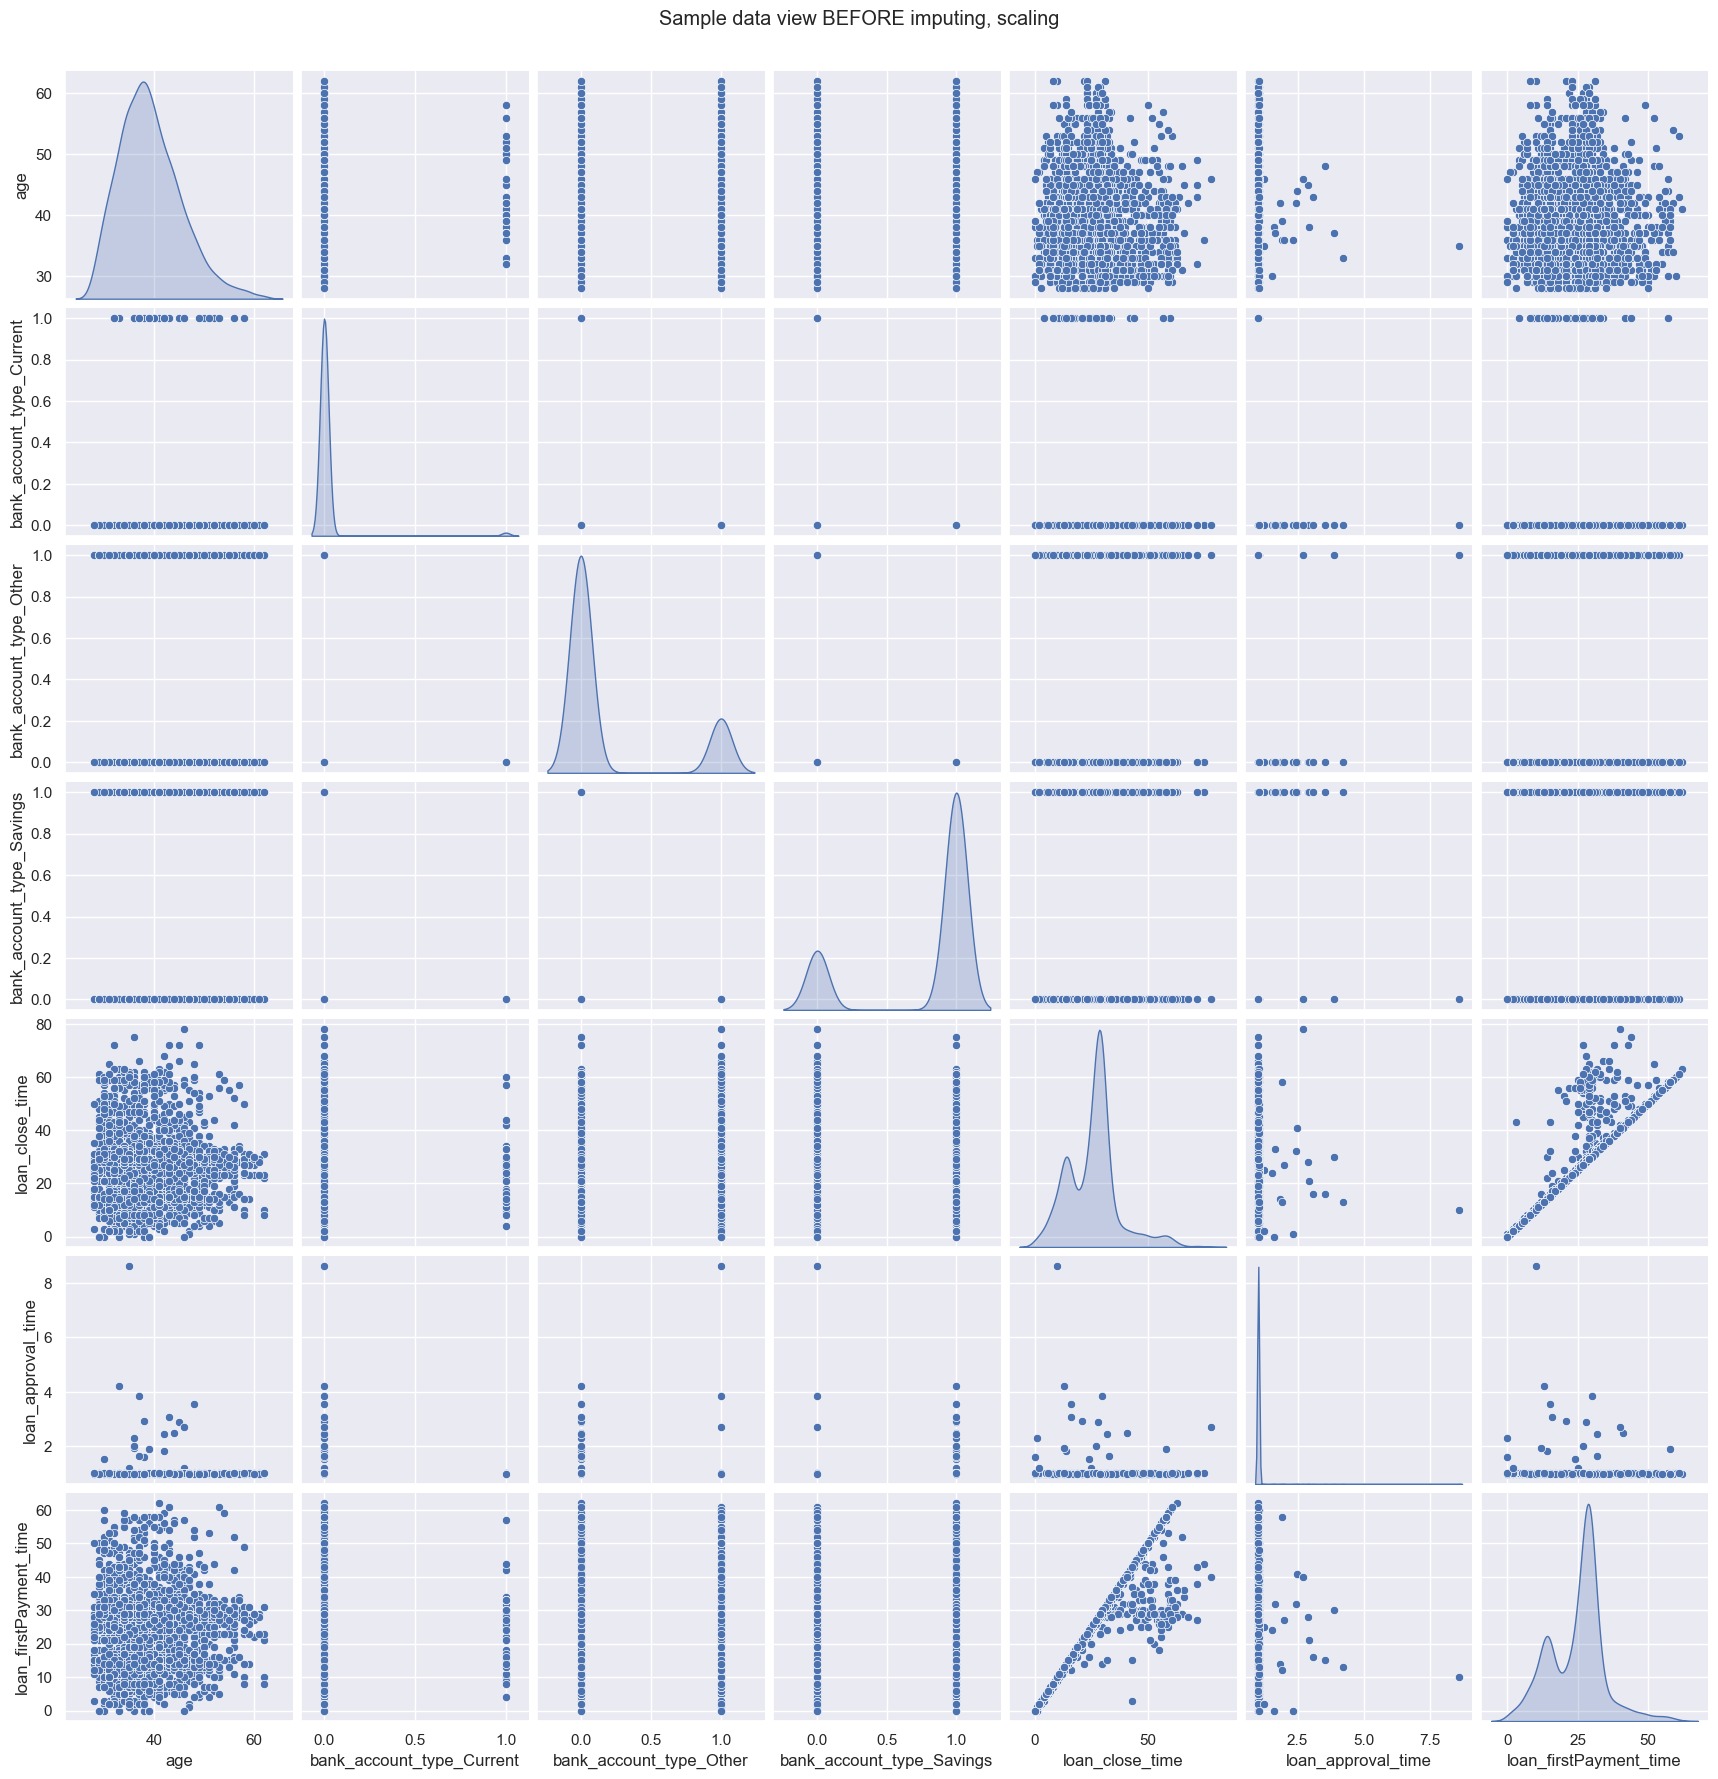

In [21]:
pr1plt = sns.pairplot(filtered_data.iloc[:, 20:30], diag_kind='kde')
pr1plt.fig.suptitle("Sample data view BEFORE imputing, scaling", y=1.02)
plt.show()
plt.close()

### From the above illustration we have outliers in our data 

In [27]:
filtered_data.head()

,customerid,bank_name_clients,employment_status_clients,level_of_education_clients,No_of_prevloans,Total_amount_borrowed,Total_amount_due,Average_termdays,last_approveddate,last_creationdate,last_closeddate,last_firstduedate,last_firstrepaiddate,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,age,bank_account_type_Current,bank_account_type_Other,bank_account_type_Savings,loan_close_time,loan_approval_time,loan_firstPayment_time
0,8a858e135cb22031015cbafc76964ebd,GT Bank,6,4,1.0000,10000.0000,11500.0000,15.0000,2017-06-19 17:55:26,2017-06-19 16:54:19,2017-07-04 18:09:47,2017-07-05 00:00:00.000000,2017-07-04 17:59:36,301964962.0000,2.0000,2017-07-05 14:29:48.000000,2017-07-05 13:29:42.000000,10000.0000,13000.0000,30.0000,Good,50.0000,False,False,True,15.0000,1.0186,15.0000
1,8a858e275c7ea5ec015c82482d7c3996,Sterling Bank,1,4,1.0000,10000.0000,13000.0000,30.0000,2017-06-07 12:47:30,2017-06-07 11:46:22,2017-07-10 08:52:54,2017-07-07 00:00:00.000000,2017-07-10 08:42:44,301972172.0000,2.0000,2017-07-10 21:21:46.000000,2017-07-10 20:21:40.000000,10000.0000,13000.0000,30.0000,Bad,38.0000,False,False,True,32.0000,1.0189,32.0000
2,8a858e5b5bd99460015bdc95cd485634,Fidelity Bank,6,4,3.0000,30000.0000,36000.0000,20.0000,2017-06-08 11:49:34,2017-06-08 10:49:27,2017-07-11 10:12:20,2017-07-10 00:00:00.000000,2017-07-11 10:02:11,301976271.0000,4.0000,2017-07-13 15:40:27.000000,2017-07-13 14:40:19.000000,10000.0000,13000.0000,30.0000,Good,37.0000,False,False,True,32.0000,1.0019,32.0000
3,8a858efd5ca70688015cabd1f1e94b55,GT Bank,1,4,1.0000,10000.0000,11500.0000,15.0000,2017-06-15 14:05:26,2017-06-15 13:04:18,2017-07-18 19:24:13,2017-06-30 00:00:00.000000,2017-07-18 19:14:05,301997763.0000,2.0000,2017-07-26 21:03:17.000000,2017-07-26 20:03:09.000000,10000.0000,11500.0000,15.0000,Good,32.0000,False,False,True,33.0000,1.0189,33.0000
6,8a858ea05a859123015a8892914d15b7,Access Bank,1,4,5.0000,70000.0000,88000.0000,30.0000,2017-06-27 13:07:32,2017-06-27 12:06:24,2017-07-21 21:57:17,2017-07-27 00:00:00.000000,2017-07-21 21:47:08,301992494.0000,6.0000,2017-07-23 21:44:43.000000,2017-07-23 20:44:36.000000,20000.0000,24500.0000,30.0000,Good,33.0000,False,False,True,24.0000,1.0189,24.0000


In [28]:
#Converting true or false to numeric
filtered_data["bank_account_type_Current"] =filtered_data["bank_account_type_Current"].astype(int)
filtered_data["bank_account_type_Other"] =filtered_data["bank_account_type_Other"].astype(int)
filtered_data["bank_account_type_Savings"] =filtered_data["bank_account_type_Savings"].astype(int)
filtered_data.head()

C:\Users\kaweesi.UG\AppData\Local\Temp\ipykernel_21536\3975280638.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["bank_account_type_Current"] =filtered_data["bank_account_type_Current"].astype(int)
C:\Users\kaweesi.UG\AppData\Local\Temp\ipykernel_21536\3975280638.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["bank_account_type_Other"] =filtered_data["bank_account_type_Other"].astype(int)
C:\Users\kaweesi.UG\AppData\Local\Temp\ipykernel_21536\3975280638.py:4: SettingWit

,customerid,bank_name_clients,employment_status_clients,level_of_education_clients,No_of_prevloans,Total_amount_borrowed,Total_amount_due,Average_termdays,last_approveddate,last_creationdate,last_closeddate,last_firstduedate,last_firstrepaiddate,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,age,bank_account_type_Current,bank_account_type_Other,bank_account_type_Savings,loan_close_time,loan_approval_time,loan_firstPayment_time
0,8a858e135cb22031015cbafc76964ebd,GT Bank,6,4,1.0000,10000.0000,11500.0000,15.0000,2017-06-19 17:55:26,2017-06-19 16:54:19,2017-07-04 18:09:47,2017-07-05 00:00:00.000000,2017-07-04 17:59:36,301964962.0000,2.0000,2017-07-05 14:29:48.000000,2017-07-05 13:29:42.000000,10000.0000,13000.0000,30.0000,Good,50.0000,0,0,1,15.0000,1.0186,15.0000
1,8a858e275c7ea5ec015c82482d7c3996,Sterling Bank,1,4,1.0000,10000.0000,13000.0000,30.0000,2017-06-07 12:47:30,2017-06-07 11:46:22,2017-07-10 08:52:54,2017-07-07 00:00:00.000000,2017-07-10 08:42:44,301972172.0000,2.0000,2017-07-10 21:21:46.000000,2017-07-10 20:21:40.000000,10000.0000,13000.0000,30.0000,Bad,38.0000,0,0,1,32.0000,1.0189,32.0000
2,8a858e5b5bd99460015bdc95cd485634,Fidelity Bank,6,4,3.0000,30000.0000,36000.0000,20.0000,2017-06-08 11:49:34,2017-06-08 10:49:27,2017-07-11 10:12:20,2017-07-10 00:00:00.000000,2017-07-11 10:02:11,301976271.0000,4.0000,2017-07-13 15:40:27.000000,2017-07-13 14:40:19.000000,10000.0000,13000.0000,30.0000,Good,37.0000,0,0,1,32.0000,1.0019,32.0000
3,8a858efd5ca70688015cabd1f1e94b55,GT Bank,1,4,1.0000,10000.0000,11500.0000,15.0000,2017-06-15 14:05:26,2017-06-15 13:04:18,2017-07-18 19:24:13,2017-06-30 00:00:00.000000,2017-07-18 19:14:05,301997763.0000,2.0000,2017-07-26 21:03:17.000000,2017-07-26 20:03:09.000000,10000.0000,11500.0000,15.0000,Good,32.0000,0,0,1,33.0000,1.0189,33.0000
6,8a858ea05a859123015a8892914d15b7,Access Bank,1,4,5.0000,70000.0000,88000.0000,30.0000,2017-06-27 13:07:32,2017-06-27 12:06:24,2017-07-21 21:57:17,2017-07-27 00:00:00.000000,2017-07-21 21:47:08,301992494.0000,6.0000,2017-07-23 21:44:43.000000,2017-07-23 20:44:36.000000,20000.0000,24500.0000,30.0000,Good,33.0000,0,0,1,24.0000,1.0189,24.0000


In [29]:
# Label enconding good and bad flag
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
filtered_data['good_bad_flag']= label_encoder.fit_transform(filtered_data['good_bad_flag'])
filtered_data.head()

C:\Users\kaweesi.UG\AppData\Local\Temp\ipykernel_21536\1439294217.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['good_bad_flag']= label_encoder.fit_transform(filtered_data['good_bad_flag'])


,customerid,bank_name_clients,employment_status_clients,level_of_education_clients,No_of_prevloans,Total_amount_borrowed,Total_amount_due,Average_termdays,last_approveddate,last_creationdate,last_closeddate,last_firstduedate,last_firstrepaiddate,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,age,bank_account_type_Current,bank_account_type_Other,bank_account_type_Savings,loan_close_time,loan_approval_time,loan_firstPayment_time
0,8a858e135cb22031015cbafc76964ebd,GT Bank,6,4,1.0000,10000.0000,11500.0000,15.0000,2017-06-19 17:55:26,2017-06-19 16:54:19,2017-07-04 18:09:47,2017-07-05 00:00:00.000000,2017-07-04 17:59:36,301964962.0000,2.0000,2017-07-05 14:29:48.000000,2017-07-05 13:29:42.000000,10000.0000,13000.0000,30.0000,1,50.0000,0,0,1,15.0000,1.0186,15.0000
1,8a858e275c7ea5ec015c82482d7c3996,Sterling Bank,1,4,1.0000,10000.0000,13000.0000,30.0000,2017-06-07 12:47:30,2017-06-07 11:46:22,2017-07-10 08:52:54,2017-07-07 00:00:00.000000,2017-07-10 08:42:44,301972172.0000,2.0000,2017-07-10 21:21:46.000000,2017-07-10 20:21:40.000000,10000.0000,13000.0000,30.0000,0,38.0000,0,0,1,32.0000,1.0189,32.0000
2,8a858e5b5bd99460015bdc95cd485634,Fidelity Bank,6,4,3.0000,30000.0000,36000.0000,20.0000,2017-06-08 11:49:34,2017-06-08 10:49:27,2017-07-11 10:12:20,2017-07-10 00:00:00.000000,2017-07-11 10:02:11,301976271.0000,4.0000,2017-07-13 15:40:27.000000,2017-07-13 14:40:19.000000,10000.0000,13000.0000,30.0000,1,37.0000,0,0,1,32.0000,1.0019,32.0000
3,8a858efd5ca70688015cabd1f1e94b55,GT Bank,1,4,1.0000,10000.0000,11500.0000,15.0000,2017-06-15 14:05:26,2017-06-15 13:04:18,2017-07-18 19:24:13,2017-06-30 00:00:00.000000,2017-07-18 19:14:05,301997763.0000,2.0000,2017-07-26 21:03:17.000000,2017-07-26 20:03:09.000000,10000.0000,11500.0000,15.0000,1,32.0000,0,0,1,33.0000,1.0189,33.0000
6,8a858ea05a859123015a8892914d15b7,Access Bank,1,4,5.0000,70000.0000,88000.0000,30.0000,2017-06-27 13:07:32,2017-06-27 12:06:24,2017-07-21 21:57:17,2017-07-27 00:00:00.000000,2017-07-21 21:47:08,301992494.0000,6.0000,2017-07-23 21:44:43.000000,2017-07-23 20:44:36.000000,20000.0000,24500.0000,30.0000,1,33.0000,0,0,1,24.0000,1.0189,24.0000
